# Algeria Socio-Economic Trends: Deep Dive Data Exploration

This notebook provides a comprehensive analysis of the cleaned dataset (`algeria_cleaned.csv`). We aim to uncover the structural dynamics of the Algerian economy, the impact of historical conflicts, and the correlation between various socio-economic indicators.

## Analysis Roadmap
1. **Economic Performance:** GDP trajectory and growth volatility.
2. **The "Black Decade" (1990s):** Quantifying the cost of conflict.
3. **Hydrocarbon Dependency:** The relationship between Oil Rents and Growth.
4. **Structural Transformation:** Evolution of Agriculture, Industry, and Services.
5. **Social Wellbeing:** The "Misery Index" (Inflation + Unemployment).
6. **Technological Adoption:** The rise of connectivity.
7. **Correlation Analysis:** Identifying key drivers of development.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (14, 7)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 12

# Ensure figures directory exists
os.makedirs("../reports/figures", exist_ok=True)

# Load Data
df = pd.read_csv("../data/processed/algeria_cleaned.csv", index_col="Year")
print(f"Data Range: {df.index.min()} - {df.index.max()}")
df.head()

Data Range: 1960 - 2022


,Access_Electricity,Agriculture_GDP,Battle_Deaths,CO2_Emissions,Education_Expenditure,Exports_GDP,FDI_Inflows_GDP,GDP_Growth,GDP_USD,Health_Expenditure,...,Inflation,Internet_Usage,Life_Expectancy,Manufacturing_GDP,Mobile_Subscriptions,Oil_Rents,Population,Population_Growth,Services_GDP,Unemployment
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,39.043173,NaN,NaN,2.723615e+09,NaN,...,NaN,0.0,40.532,NaN,0.0,NaN,11394307.0,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,46.244557,NaN,-13.605441,2.434747e+09,NaN,...,NaN,0.0,40.516,NaN,0.0,NaN,11598608.0,1.777125,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,19.793873,NaN,-19.685042,2.001445e+09,NaN,...,NaN,0.0,39.323,NaN,0.0,NaN,11778260.0,1.537037,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,24.684682,NaN,34.313729,2.702982e+09,NaN,...,NaN,0.0,42.908,NaN,0.0,NaN,11969451.0,1.610219,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,25.084059,NaN,5.839413,2.909316e+09,NaN,...,NaN,0.0,42.788,NaN,0.0,NaN,12179099.0,1.736363,NaN,NaN


## 1. Economic Performance: Volatility and Growth
Algeria's economy has seen significant volatility. We visualize the GDP in USD alongside the annual growth rate.

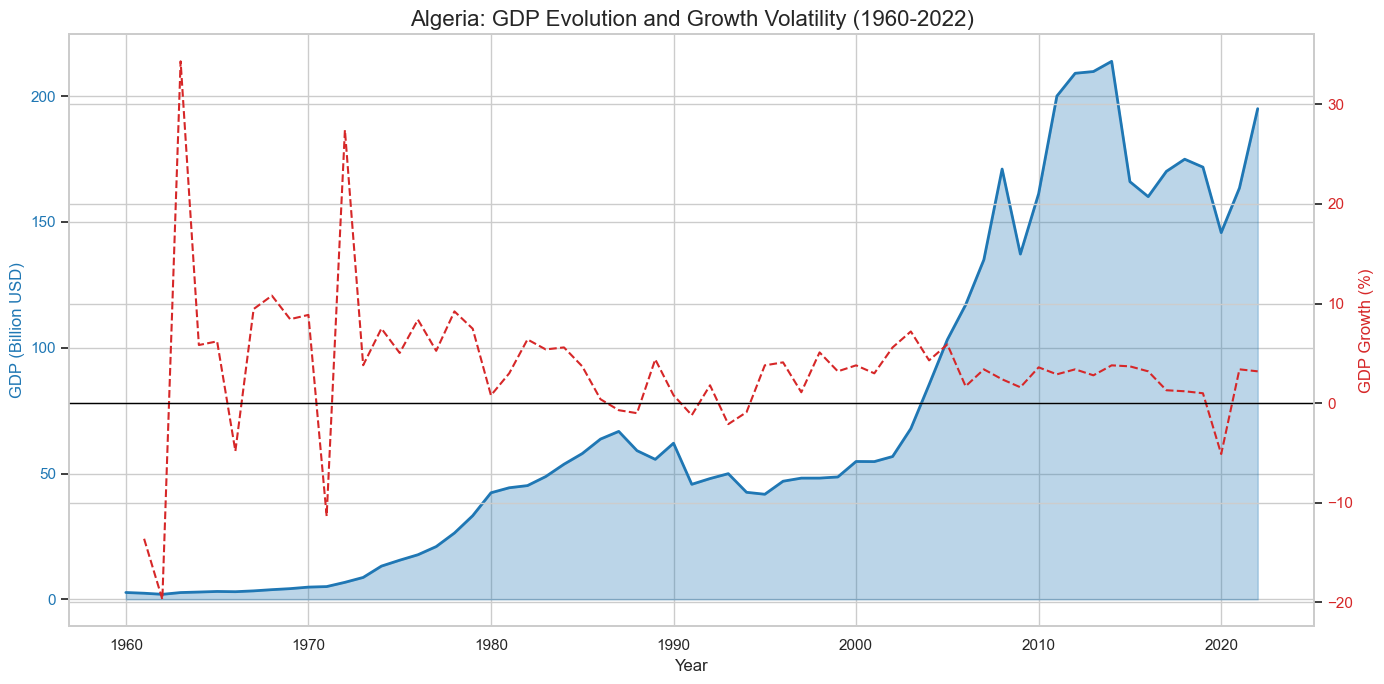

In [14]:
fig, ax1 = plt.subplots()

# Plot GDP (USD)
color = '#1f77b4'
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Billion USD)', color=color)
ax1.fill_between(df.index, df['GDP_USD'] / 1e9, color=color, alpha=0.3)
ax1.plot(df.index, df['GDP_USD'] / 1e9, color=color, linewidth=2, label='GDP (USD)')
ax1.tick_params(axis='y', labelcolor=color)

# Plot GDP Growth
ax2 = ax1.twinx()
color = '#d62728'
ax2.set_ylabel('GDP Growth (%)', color=color)
ax2.plot(df.index, df['GDP_Growth'], color=color, linestyle='--', linewidth=1.5, label='Growth %')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(0, color='black', linewidth=1, linestyle='-')

plt.title('Algeria: GDP Evolution and Growth Volatility (1960-2022)')
fig.tight_layout()
plt.savefig("../reports/figures/gdp_evolution.png", dpi=300)
plt.show()

## 2. The "Black Decade" (1990s): Conflict & Economy
The 1990s were marked by civil conflict. Here we overlay **Battle-related Deaths** with **GDP Growth** to see the correlation between instability and economic stagnation.

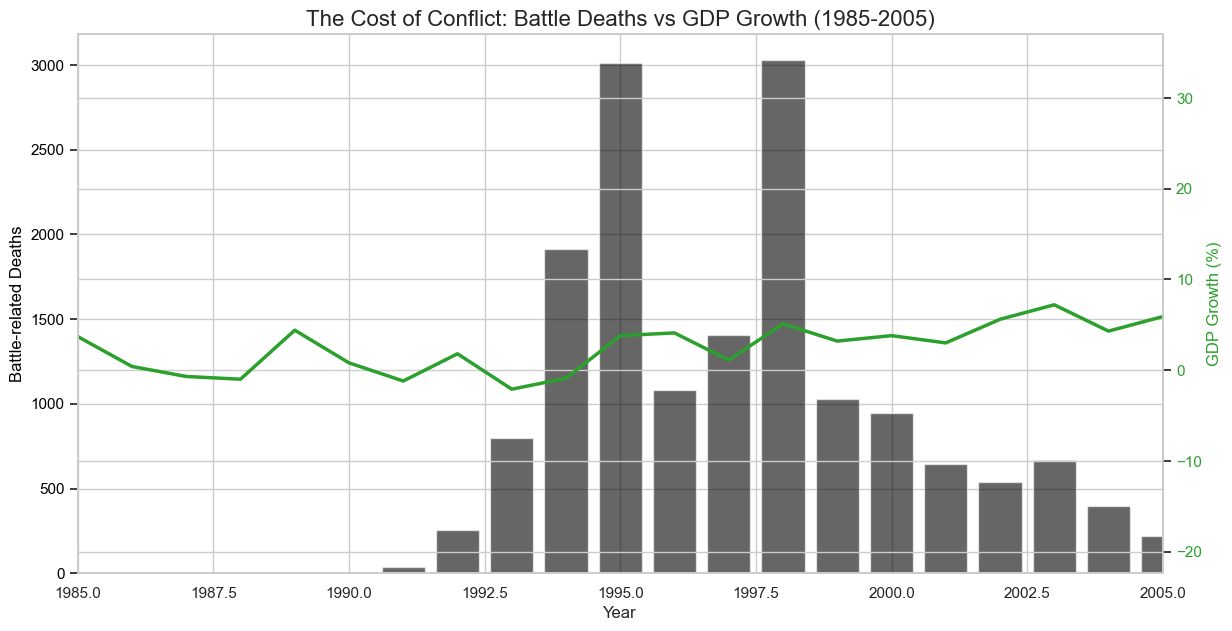

In [15]:
fig, ax1 = plt.subplots()

# Battle Deaths (Bar Plot)
color = 'black'
ax1.set_xlabel('Year')
ax1.set_ylabel('Battle-related Deaths', color=color)
ax1.bar(df.index, df['Battle_Deaths'], color=color, alpha=0.6, label='Battle Deaths')
ax1.tick_params(axis='y', labelcolor=color)

# GDP Growth (Line Plot)
ax2 = ax1.twinx()
color = '#2ca02c'
ax2.set_ylabel('GDP Growth (%)', color=color)
ax2.plot(df.index, df['GDP_Growth'], color=color, linewidth=2.5, label='GDP Growth')
ax2.tick_params(axis='y', labelcolor=color)

# Focus on 1985-2005
plt.xlim(1985, 2005)
plt.title('The Cost of Conflict: Battle Deaths vs GDP Growth (1985-2005)')
plt.savefig("../reports/figures/battle_deaths_gdp.png", dpi=300)
plt.show()

## 3. Hydrocarbon Dependency: The Oil Trap
Does high oil rent lead to better growth? Or does it expose the economy to external shocks? Let's visualize the relationship.

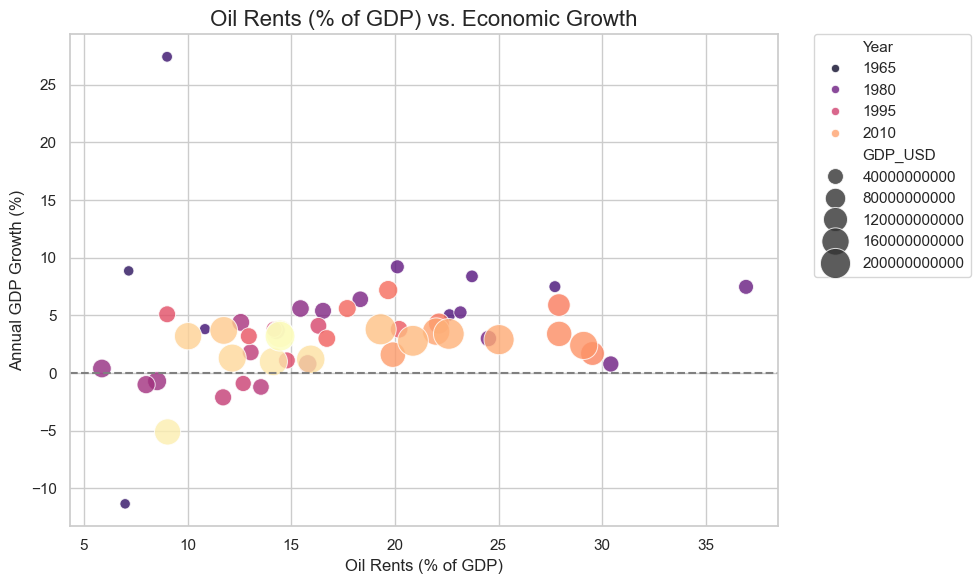

In [16]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df, 
    x='Oil_Rents', 
    y='GDP_Growth', 
    hue='Year', 
    palette='magma', 
    size='GDP_USD', 
    sizes=(50, 500), 
    alpha=0.8
)
plt.axhline(0, color='grey', linestyle='--')
plt.title('Oil Rents (% of GDP) vs. Economic Growth')
plt.xlabel('Oil Rents (% of GDP)')
plt.ylabel('Annual GDP Growth (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("../reports/figures/oil_rents_correlation.png", dpi=300)
plt.show()

## 4. Structural Transformation: Sectoral Analysis
How has the composition of the Algerian economy changed? We look at the value added by Agriculture, Industry, and Services.

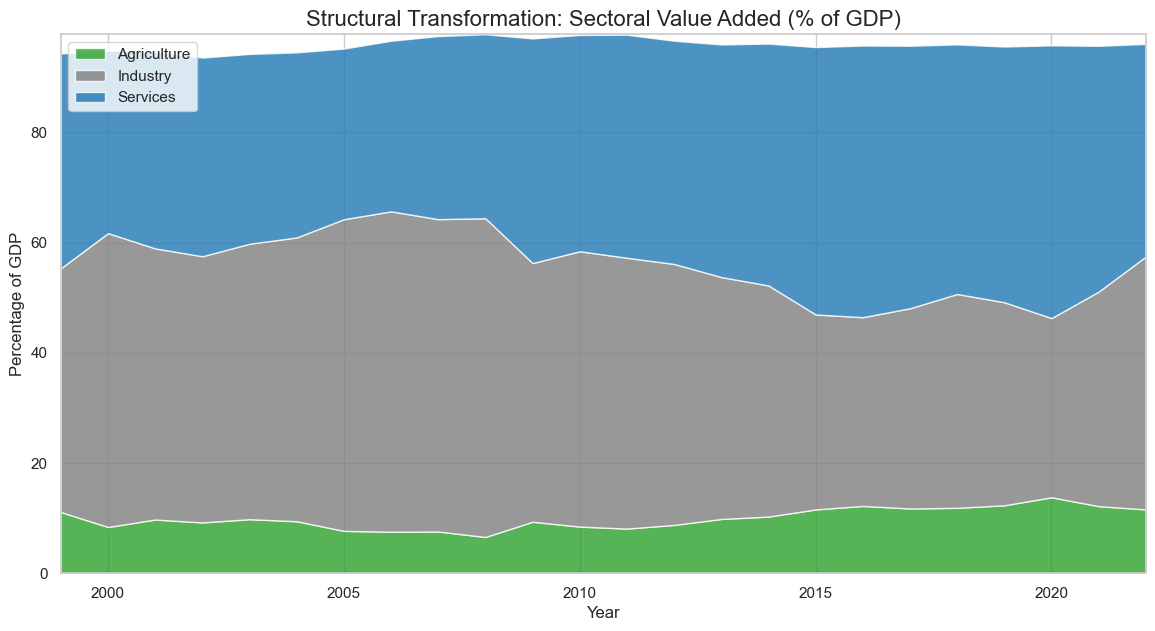

In [17]:
sectors = ['Agriculture_GDP', 'Industry_GDP', 'Services_GDP']
colors = ['#2ca02c', '#7f7f7f', '#1f77b4']

plt.figure(figsize=(14, 7))
plt.stackplot(df.index, df[sectors].T, labels=['Agriculture', 'Industry', 'Services'], colors=colors, alpha=0.8)
plt.legend(loc='upper left')
plt.title('Structural Transformation: Sectoral Value Added (% of GDP)')
plt.ylabel('Percentage of GDP')
plt.xlabel('Year')
plt.margins(0, 0)
plt.savefig("../reports/figures/structural_transformation.png", dpi=300)
plt.show()

## 5. Social Wellbeing: The Misery Index
The **Misery Index** is often calculated as the sum of the **Inflation Rate** and the **Unemployment Rate**. A higher number indicates higher economic distress for the average citizen.

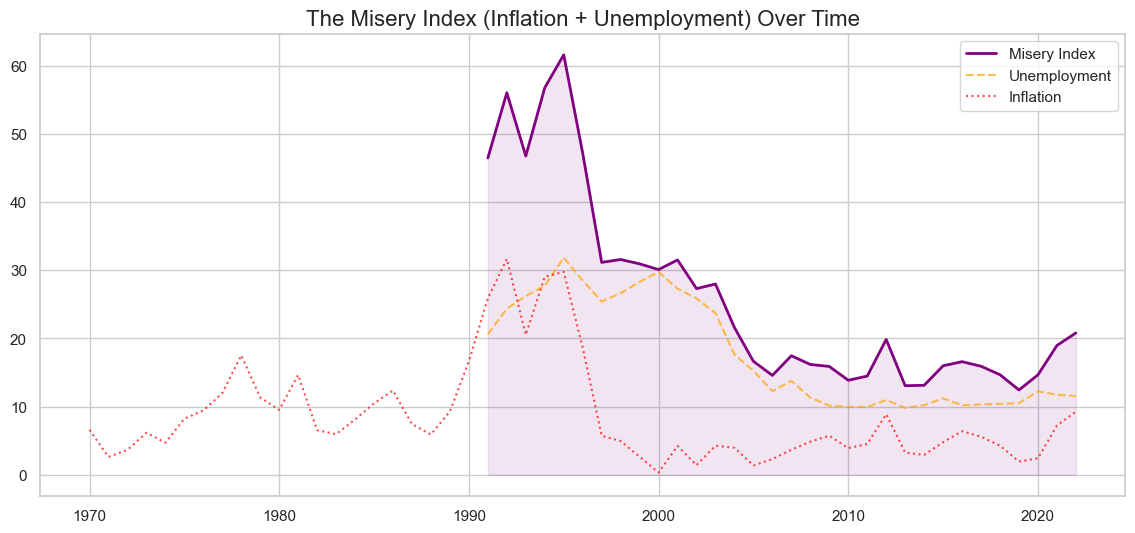

In [18]:
# Calculate Misery Index
df['Misery_Index'] = df['Inflation'] + df['Unemployment']

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Misery_Index'], color='purple', linewidth=2, label='Misery Index')
plt.fill_between(df.index, df['Misery_Index'], color='purple', alpha=0.1)

# Decompose it
plt.plot(df.index, df['Unemployment'], color='orange', linestyle='--', alpha=0.7, label='Unemployment')
plt.plot(df.index, df['Inflation'], color='red', linestyle=':', alpha=0.7, label='Inflation')

plt.title('The Misery Index (Inflation + Unemployment) Over Time')
plt.legend()
plt.savefig("../reports/figures/misery_index.png", dpi=300)
plt.show()

## 6. Technological Adoption
Validating our data cleaning: Internet and Mobile usage should be zero in the early years and explode in the 2000s.

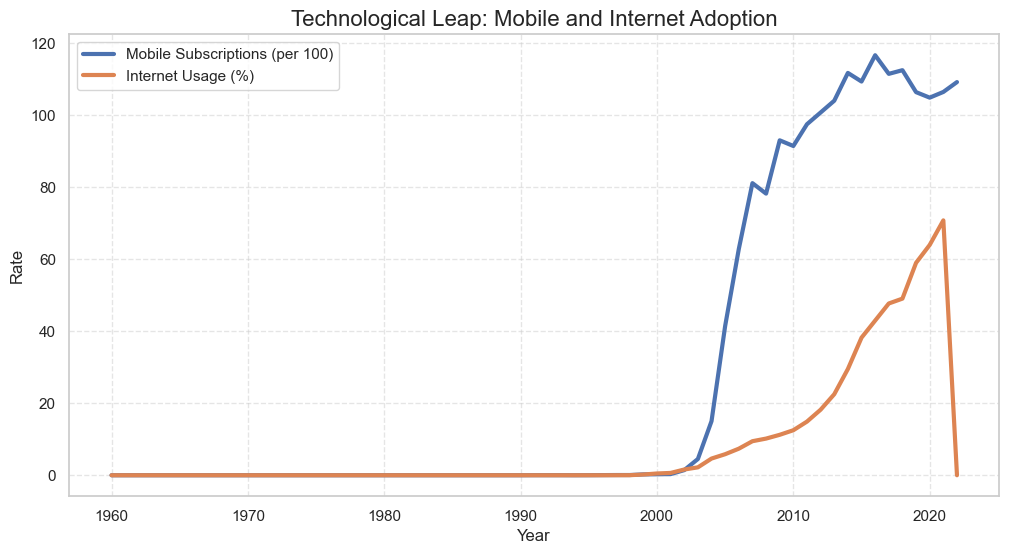

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Mobile_Subscriptions'], label='Mobile Subscriptions (per 100)', linewidth=3)
plt.plot(df.index, df['Internet_Usage'], label='Internet Usage (%)', linewidth=3)

plt.title('Technological Leap: Mobile and Internet Adoption')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.savefig("../reports/figures/tech_adoption.png", dpi=300)
plt.show()

## 7. Correlation Matrix
Finally, let's look at the global correlations between our "Gold Indicators" to find potential drivers for our predictive models.

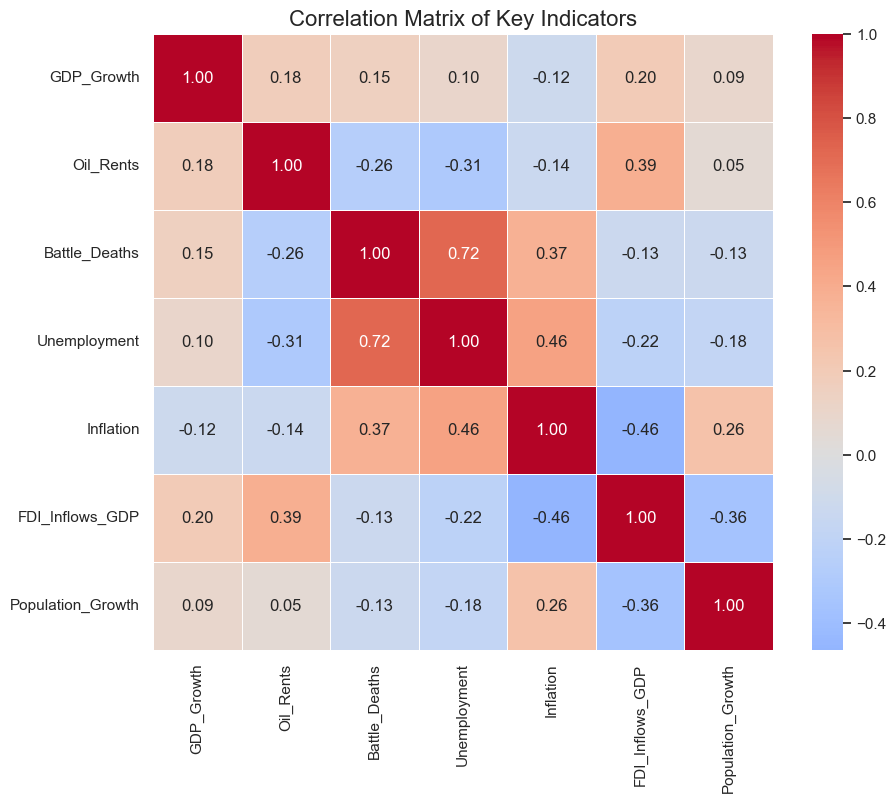

In [20]:
cols_to_corr = ['GDP_Growth', 'Oil_Rents', 'Battle_Deaths', 'Unemployment', 'Inflation', 'FDI_Inflows_GDP', 'Population_Growth']
corr_matrix = df[cols_to_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Indicators')
plt.savefig("../reports/figures/correlation_matrix.png", dpi=300)
plt.show()